In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


## Part I - Data Pre-Proccessing
- ### Read In Data and Define Final Feature Set
- ### deleted all race columns except minority patient binary flag and ethnicity_14 (hispanic)
- ### scale labs for both data frames 
- ### convert EMRGNCY and INOUT to binary 

In [2]:
# read in training data and test data
training_data = pd.read_csv('../Data/hip_fracture_training.csv')
test_data = pd.read_csv('../Data/hip_fracture_test.csv')

In [3]:
display(training_data.shape)
display(test_data.shape)

(29188, 219)

(7297, 219)

In [4]:
# final feature set based on the seperate models
full_cols = ['DeepSSIPost_81', 'OrganSpacePost_84', 'PneumoniaPost_88', 'ReintubPost_90', 'PulmEmbPost_92', 
    'ProgRenalPost_96', 'UTIPost_100', 'MIPost_105', 'BleedingTfnPost_108', 'DVTPost_109', 
    'DVTProphylaxisPost28_24','SepsisPost_112','ReOPPost_116', 'CardiacComplications', 
    'InfectiousComplications', 'Stroke_2', 'WBATPOD1_21', 'PostOpPRESSORE_26', 'PostOpDelirium_29', 
    'PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE', 
    'SmokePre_37', 'DyspneaPre_38', 'DyspneaPre_39', 'DyspneaPre_40', 
    'FncStatusPre_41', 'FncStatusPre_42', 'FncStatusPre_43', 'FncStatusPre_44', 
    'VentDepPre_46', 'COPDPre_48', 'AscitesPre_50', 'CHFPre_52', 'HTNPre_54', 
    'DialysisPre_56', 'CancerPre_58', 'WoundInfectionPre_60', 'SteroidPre_62', 
    'WtLossPre_64', 'BleedingDisPre_66', 'TfnPre_68', 'SepsisPre_69', 'SepsisPre_70', 
    'SepsisPre_71', 'SepsisPre_72', 'ASAPre_73', 'ASAPre_74', 'ASAPre_75', 'ASAPre_76', 
    'ASAPre_77', 'ASAPre_78', 'PreOpDementia_2', 'PreOpDelirium_5', 'PreOpBoneMeds_7', 
    'PreOpMOBAID_10', 'PreOpPressSore_12', 'PartialorFullFuncStatus', 'DiabetesBinary','MFI5', 
    'ObesityBinary', 'MinorityPatient', 'AGE', 'Ethnicity_14', 'GenderData_1', 'GenderData_2', 
    'GenderData_3', 'TransferStatus_17', 'TransferStatus_18','DispoLocationPost_28','DispoLocationPost_30', 'MEDMGMT_14', 
    'StandardHip_17', 'HipFractureType_44','HipFractureType_45', 'HipFractureType_46', 
    'HipFractureType_47', 'HipFractureType_48','PathologicHipFractures_51', 
    'INOUT', 'EMERGNCY', 'OPTIME', 'TOTHLOS', 'HTOODAY','READMISSION30D']

In [5]:
# define filter data function and filter BOTH training and test data frames
def filter_data(df_train, df_test, cols): 

    # filters for only the preoperative columns
    df_train_filtered = df_train[cols]
    df_test_filtered = df_test[cols]

    return df_train_filtered, df_test_filtered   

# call function to get 
training_data_final, test_data_final = filter_data(training_data, test_data, full_cols)

In [6]:
# display information for training data
display(training_data_final.shape)
display(training_data_final.isna().sum())
display(training_data_final.info())

(29188, 88)

DeepSSIPost_81       0
OrganSpacePost_84    0
PneumoniaPost_88     0
ReintubPost_90       0
PulmEmbPost_92       0
                    ..
EMERGNCY             0
OPTIME               0
TOTHLOS              0
HTOODAY              0
READMISSION30D       0
Length: 88, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29188 entries, 0 to 29187
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             29188 non-null  int64  
 1   OrganSpacePost_84          29188 non-null  int64  
 2   PneumoniaPost_88           29188 non-null  int64  
 3   ReintubPost_90             29188 non-null  int64  
 4   PulmEmbPost_92             29188 non-null  int64  
 5   ProgRenalPost_96           29188 non-null  int64  
 6   UTIPost_100                29188 non-null  int64  
 7   MIPost_105                 29188 non-null  int64  
 8   BleedingTfnPost_108        29188 non-null  int64  
 9   DVTPost_109                29188 non-null  int64  
 10  DVTProphylaxisPost28_24    29188 non-null  int64  
 11  SepsisPost_112             29188 non-null  int64  
 12  ReOPPost_116               29188 non-null  int64  
 13  CardiacComplications       29188 non-null  int

None

In [7]:
# display information for test data
display(test_data_final.shape)
display(test_data_final.isna().sum())
display(test_data_final.info())


(7297, 88)

DeepSSIPost_81       0
OrganSpacePost_84    0
PneumoniaPost_88     0
ReintubPost_90       0
PulmEmbPost_92       0
                    ..
EMERGNCY             0
OPTIME               0
TOTHLOS              0
HTOODAY              0
READMISSION30D       0
Length: 88, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7297 entries, 0 to 7296
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             7297 non-null   int64  
 1   OrganSpacePost_84          7297 non-null   int64  
 2   PneumoniaPost_88           7297 non-null   int64  
 3   ReintubPost_90             7297 non-null   int64  
 4   PulmEmbPost_92             7297 non-null   int64  
 5   ProgRenalPost_96           7297 non-null   int64  
 6   UTIPost_100                7297 non-null   int64  
 7   MIPost_105                 7297 non-null   int64  
 8   BleedingTfnPost_108        7297 non-null   int64  
 9   DVTPost_109                7297 non-null   int64  
 10  DVTProphylaxisPost28_24    7297 non-null   int64  
 11  SepsisPost_112             7297 non-null   int64  
 12  ReOPPost_116               7297 non-null   int64  
 13  CardiacComplications       7297 non-null   int64

None

In [8]:
# next we need to scale the lab values 
lab_cols = ['PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE']

def scale_labs(training_df, test_df, lab_cols):

    # impute missing values with the median
    imputer = SimpleImputer(strategy='median')

    # create a DataFrame with only the lab columns
    training_lab_df = training_df[lab_cols]

    # replace missing values (-99) with NaN
    training_lab_df = training_lab_df.replace(-99, np.nan)

    # fill missing lab values in training data with median 
    training_lab_df = imputer.fit_transform(training_lab_df)

    # replace test df -99 with na in test data 
    test_lab_df = test_df[lab_cols].replace(-99, np.nan)

    # fill  missing lab values in test data with median lab values 
    test_lab_df = imputer.transform(test_lab_df)

    # create a StandardScaler object
    scaler = StandardScaler()

    # fit the scaler to the lab data
    scaler.fit(training_lab_df)

    # transform the lab data in training and test sets
    scaled_training_data = scaler.transform(training_lab_df)
    scaled_test_data = scaler.transform(test_lab_df)

    # create a new DataFrames with the scaled lab data
    scaled_training_data = pd.DataFrame(scaled_training_data, columns=lab_cols)
    scaled_test_data = pd.DataFrame(scaled_test_data, columns=lab_cols)

    # create a new DataFrame that contains both the scaled lab columns and the other columns from the input DataFrame
    scaled_training_data = pd.concat([training_df.drop(lab_cols, axis=1), scaled_training_data], axis=1)
    scaled_test_data = pd.concat([test_df.drop(lab_cols, axis=1), scaled_test_data], axis=1)

    return scaled_training_data, scaled_test_data


training_scaled, test_scaled = scale_labs(training_data_final, test_data_final, lab_cols)

In [9]:
# display scaled training data 
display(training_scaled.shape)
display(training_scaled.head())

(29188, 88)

,DeepSSIPost_81,OrganSpacePost_84,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,ProgRenalPost_96,UTIPost_100,MIPost_105,BleedingTfnPost_108,DVTPost_109,DVTProphylaxisPost28_24,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,PartialorFullFuncStatus,DiabetesBinary,MFI5,ObesityBinary,MinorityPatient,AGE,Ethnicity_14,GenderData_1,GenderData_2,GenderData_3,TransferStatus_17,TransferStatus_18,DispoLocationPost_28,DispoLocationPost_30,MEDMGMT_14,StandardHip_17,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_51,INOUT,EMERGNCY,OPTIME,TOTHLOS,HTOODAY,READMISSION30D,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,Inpatient,No,101,5,1,0,0.240328,-0.457357,-0.502422,0.460396,0.306751,0.582291
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,90,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,Inpatient,No,38,6,0,0,0.240328,-1.126433,-0.338898,-0.140167,0.343554,-0.824676
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,90,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,Inpatient,Yes,71,4,0,0,-0.024477,-0.457357,-0.590474,-0.085570,0.914002,-0.694401
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,69,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Inpatient,No,165,7,1,0,-0.289283,-0.039186,0.038465,-0.931818,1.521253,0.347796
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,3,0,0,88,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,Inpatient,Yes,111,11,2,1,0.505134,-0.457357,-0.464686,0.624186,0.085932,0.425961


In [10]:
# display scaled test data 
display(test_scaled.shape)
display(test_scaled.head())


(7297, 88)

,DeepSSIPost_81,OrganSpacePost_84,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,ProgRenalPost_96,UTIPost_100,MIPost_105,BleedingTfnPost_108,DVTPost_109,DVTProphylaxisPost28_24,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,PartialorFullFuncStatus,DiabetesBinary,MFI5,ObesityBinary,MinorityPatient,AGE,Ethnicity_14,GenderData_1,GenderData_2,GenderData_3,TransferStatus_17,TransferStatus_18,DispoLocationPost_28,DispoLocationPost_30,MEDMGMT_14,StandardHip_17,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_51,INOUT,EMERGNCY,OPTIME,TOTHLOS,HTOODAY,READMISSION30D,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,2,0,0,82,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,Inpatient,No,68,4,1,0,0.240328,-0.791895,-0.464686,-0.358554,-0.686933,0.269632
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,88,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,Inpatient,No,34,5,0,0,0.240328,0.880793,1.183132,4.473248,-0.944555,1.481186
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,87,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,Inpatient,Yes,89,3,0,0,-0.024477,-1.210067,-0.615631,-0.385852,0.729986,1.324856
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,85,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,Inpatient,Yes,103,4,0,0,-0.024477,0.713524,0.227146,0.596887,1.723670,0.608346
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,72,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,Inpatient,No,92,5,0,0,-0.818894,-0.624626,-0.716261,1.388538,0.490766,0.634401


In [11]:
# convert these two to binary - check value counts to make sure no new values in test data
display(test_scaled['EMERGNCY'].value_counts())
display(test_scaled['INOUT'].value_counts())

No     5990
Yes    1307
Name: EMERGNCY, dtype: int64

Inpatient     7270
Outpatient      27
Name: INOUT, dtype: int64

In [12]:
# convert EMERGENCY and INOUT to binary
def convert_binary(training_df, test_df): 

    # define binary encodings
    encoding_EMERGENCY = {'No': 0, 'Yes': 1}
    encoding_INOUT = {'Inpatient': 1, 'Outpatient': 0}

    # convert EMERGNCY and INOUT to binary in training set
    training_df['EMERGNCY'] = training_df['EMERGNCY'].map(encoding_EMERGENCY)
    training_df['INOUT'] = training_df['INOUT'].map(encoding_INOUT)
    training_df_encoded = training_df 

    # convert EMERGNCY and INOUT to binary in test set
    test_df['EMERGNCY'] = test_df['EMERGNCY'].map(encoding_EMERGENCY)
    test_df['INOUT'] = test_df['INOUT'].map(encoding_INOUT)
    test_df_encoded = test_df 

    return training_df_encoded, test_df_encoded

training_encoded, test_encoded = convert_binary(training_scaled, test_scaled)


In [13]:
display(training_encoded.shape)
display(training_encoded.head())

(29188, 88)

,DeepSSIPost_81,OrganSpacePost_84,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,ProgRenalPost_96,UTIPost_100,MIPost_105,BleedingTfnPost_108,DVTPost_109,DVTProphylaxisPost28_24,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,PartialorFullFuncStatus,DiabetesBinary,MFI5,ObesityBinary,MinorityPatient,AGE,Ethnicity_14,GenderData_1,GenderData_2,GenderData_3,TransferStatus_17,TransferStatus_18,DispoLocationPost_28,DispoLocationPost_30,MEDMGMT_14,StandardHip_17,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_51,INOUT,EMERGNCY,OPTIME,TOTHLOS,HTOODAY,READMISSION30D,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,101,5,1,0,0.240328,-0.457357,-0.502422,0.460396,0.306751,0.582291
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,90,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,38,6,0,0,0.240328,-1.126433,-0.338898,-0.140167,0.343554,-0.824676
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,90,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,71,4,0,0,-0.024477,-0.457357,-0.590474,-0.085570,0.914002,-0.694401
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,69,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,165,7,1,0,-0.289283,-0.039186,0.038465,-0.931818,1.521253,0.347796
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,3,0,0,88,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,111,11,2,1,0.505134,-0.457357,-0.464686,0.624186,0.085932,0.425961


In [14]:
display(test_encoded.shape)
display(test_encoded.head())


(7297, 88)

,DeepSSIPost_81,OrganSpacePost_84,PneumoniaPost_88,ReintubPost_90,PulmEmbPost_92,ProgRenalPost_96,UTIPost_100,MIPost_105,BleedingTfnPost_108,DVTPost_109,DVTProphylaxisPost28_24,SepsisPost_112,ReOPPost_116,CardiacComplications,InfectiousComplications,Stroke_2,WBATPOD1_21,PostOpPRESSORE_26,PostOpDelirium_29,SmokePre_37,DyspneaPre_38,DyspneaPre_39,DyspneaPre_40,FncStatusPre_41,FncStatusPre_42,FncStatusPre_43,FncStatusPre_44,VentDepPre_46,COPDPre_48,AscitesPre_50,CHFPre_52,HTNPre_54,DialysisPre_56,CancerPre_58,WoundInfectionPre_60,SteroidPre_62,WtLossPre_64,BleedingDisPre_66,TfnPre_68,SepsisPre_69,SepsisPre_70,SepsisPre_71,SepsisPre_72,ASAPre_73,ASAPre_74,ASAPre_75,ASAPre_76,ASAPre_77,ASAPre_78,PreOpDementia_2,PreOpDelirium_5,PreOpBoneMeds_7,PreOpMOBAID_10,PreOpPressSore_12,PartialorFullFuncStatus,DiabetesBinary,MFI5,ObesityBinary,MinorityPatient,AGE,Ethnicity_14,GenderData_1,GenderData_2,GenderData_3,TransferStatus_17,TransferStatus_18,DispoLocationPost_28,DispoLocationPost_30,MEDMGMT_14,StandardHip_17,HipFractureType_44,HipFractureType_45,HipFractureType_46,HipFractureType_47,HipFractureType_48,PathologicHipFractures_51,INOUT,EMERGNCY,OPTIME,TOTHLOS,HTOODAY,READMISSION30D,PRSODM,PRBUN,PRCREAT,PRWBC,PRHCT,PRPLATE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,2,0,0,82,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,68,4,1,0,0.240328,-0.791895,-0.464686,-0.358554,-0.686933,0.269632
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,88,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,34,5,0,0,0.240328,0.880793,1.183132,4.473248,-0.944555,1.481186
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,87,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,89,3,0,0,-0.024477,-1.210067,-0.615631,-0.385852,0.729986,1.324856
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,85,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,103,4,0,0,-0.024477,0.713524,0.227146,0.596887,1.723670,0.608346
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,72,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,92,5,0,0,-0.818894,-0.624626,-0.716261,1.388538,0.490766,0.634401


## Part II - Modelling 
- ### first we will define our labels and predictors for our training and test set
- ### then we will train a random forest using our hyperparameters from our optimized model and predict on our test set
- ### finally we will look at the feature importance and AUROC of our final model

In [15]:
# check for differences in class balance between training and test now - should be similar because split was stratified 
display(test_encoded['READMISSION30D'].value_counts())
display(training_encoded['READMISSION30D'].value_counts())

0    6570
1     727
Name: READMISSION30D, dtype: int64

0    26385
1     2803
Name: READMISSION30D, dtype: int64

In [16]:
# define split function
def split_data(training_encoded, test_encoded):
    X_train = training_encoded.drop(labels = ['READMISSION30D'], axis = 1)
    y_train = training_encoded['READMISSION30D']
    X_test = test_encoded.drop(labels = ['READMISSION30D'], axis = 1)
    y_test = test_encoded['READMISSION30D']

    return X_train,X_test,y_train,y_test

In [17]:
# get label and predictors for training/test
X_train,X_test,y_train,y_test = split_data(training_encoded, test_encoded)

display(X_train.info())
display(X_test.info())

display(y_train.info())
display(y_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29188 entries, 0 to 29187
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             29188 non-null  int64  
 1   OrganSpacePost_84          29188 non-null  int64  
 2   PneumoniaPost_88           29188 non-null  int64  
 3   ReintubPost_90             29188 non-null  int64  
 4   PulmEmbPost_92             29188 non-null  int64  
 5   ProgRenalPost_96           29188 non-null  int64  
 6   UTIPost_100                29188 non-null  int64  
 7   MIPost_105                 29188 non-null  int64  
 8   BleedingTfnPost_108        29188 non-null  int64  
 9   DVTPost_109                29188 non-null  int64  
 10  DVTProphylaxisPost28_24    29188 non-null  int64  
 11  SepsisPost_112             29188 non-null  int64  
 12  ReOPPost_116               29188 non-null  int64  
 13  CardiacComplications       29188 non-null  int

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7297 entries, 0 to 7296
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             7297 non-null   int64  
 1   OrganSpacePost_84          7297 non-null   int64  
 2   PneumoniaPost_88           7297 non-null   int64  
 3   ReintubPost_90             7297 non-null   int64  
 4   PulmEmbPost_92             7297 non-null   int64  
 5   ProgRenalPost_96           7297 non-null   int64  
 6   UTIPost_100                7297 non-null   int64  
 7   MIPost_105                 7297 non-null   int64  
 8   BleedingTfnPost_108        7297 non-null   int64  
 9   DVTPost_109                7297 non-null   int64  
 10  DVTProphylaxisPost28_24    7297 non-null   int64  
 11  SepsisPost_112             7297 non-null   int64  
 12  ReOPPost_116               7297 non-null   int64  
 13  CardiacComplications       7297 non-null   int64

None

<class 'pandas.core.series.Series'>
RangeIndex: 29188 entries, 0 to 29187
Series name: READMISSION30D
Non-Null Count  Dtype
--------------  -----
29188 non-null  int64
dtypes: int64(1)
memory usage: 228.2 KB


None

<class 'pandas.core.series.Series'>
RangeIndex: 7297 entries, 0 to 7296
Series name: READMISSION30D
Non-Null Count  Dtype
--------------  -----
7297 non-null   int64
dtypes: int64(1)
memory usage: 57.1 KB


None

In [18]:
# train a lasso logistic regression on the full data set and predict on the test set

def Lasso_logistic(X_train,X_test,y_train): 

    # instantiate lasso logistic regression using optimized hyperparamaters
    lasso_model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=None, random_state = 42)
    # fit optimized model 
    lasso_model.fit(X_train, y_train)

    # predict using optimized model 
    test_preds = lasso_model.predict(X_test)

    return lasso_model, test_preds

In [19]:
# test cell for lasso logistic regression
lasso_model, test_preds = Lasso_logistic(X_train,X_test,y_train)

In [20]:
# print classification report of final model
print(f'Classifcation report for model performance (Lasso) on ALL patients\n{classification_report(y_test, test_preds)}')

Classifcation report for model performance (Lasso) on ALL patients
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      6570
           1       0.75      0.26      0.39       727

    accuracy                           0.92      7297
   macro avg       0.84      0.63      0.67      7297
weighted avg       0.91      0.92      0.90      7297



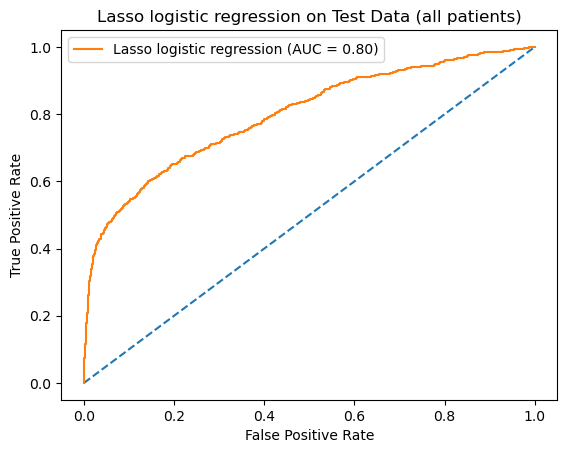

In [21]:
# Calculate and plot the ROC AUC curve for Lasso logistic regression
y_prob = lasso_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
random_guess = np.linspace(0, 1, len(y_test))
plt.plot(random_guess, random_guess, linestyle='--')
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.title('Lasso logistic regression on Test Data (all patients)')
plt.plot(fpr, tpr, label=f"Lasso logistic regression (AUC = {roc_auc:.2f})")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Part III - Patient Stratification
- ### now that we have gotten our final model performance we want to see if it performs similarly on different patient populations
- ### we will stratify out just minority patients from our test data set and predict on ONLY this subset WITHOUT retraining the model 


In [22]:
# filters out test data set
def filter_minority(test_encoded):
    #filter test data set for just minority patients
    minority_test_df = test_encoded[test_encoded['MinorityPatient'] == 1]
    non_minority_df = test_encoded[test_encoded['MinorityPatient'] == 0]

    return minority_test_df, non_minority_df

In [23]:
#f ilter for minority patients only 
minority_df, non_minority_df = filter_minority(test_encoded)

# define predictors and labels for minority df
X_test_minority = minority_df.drop(labels = ['READMISSION30D'], axis = 1)
y_test_minority = minority_df['READMISSION30D']

# get minority preds
minority_preds = lasso_model.predict(X_test_minority)

In [24]:
# print classification report for performance of model on minority patients
print(f'Classifcation report for model performance (Lasso) on minority patients\n{classification_report(y_test_minority, minority_preds)}')

Classifcation report for model performance (Lasso) on minority patients
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       604
           1       0.74      0.37      0.50        75

    accuracy                           0.92       679
   macro avg       0.83      0.68      0.72       679
weighted avg       0.91      0.92      0.90       679



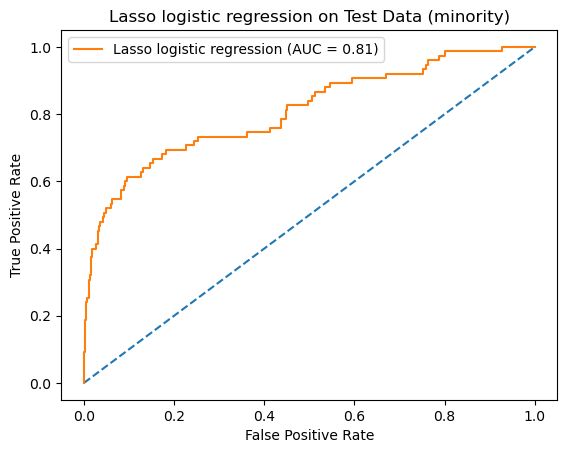

In [25]:
# Calculate and plot the ROC AUC curve for Lasso logistic regression
y_prob_minority = lasso_model.predict_proba(X_test_minority)[:, 1]
roc_auc = roc_auc_score(y_test_minority, y_prob_minority)
random_guess_minority = np.linspace(0, 1, len(y_test_minority))
plt.plot(random_guess_minority, random_guess_minority, linestyle='--')
fpr, tpr, thresholds = roc_curve(y_test_minority, y_prob_minority)
plt.title('Lasso logistic regression on Test Data (minority)')
plt.plot(fpr, tpr, label=f"Lasso logistic regression (AUC = {roc_auc:.2f})")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [26]:
#define predictors and labels for non-minority df
X_test_non_minority = non_minority_df.drop(labels = ['READMISSION30D'], axis = 1)
y_test_non_minority = non_minority_df['READMISSION30D']

#get non-minority preds 
non_minority_preds = lasso_model.predict(X_test_non_minority)

#print classification report for performance of model on minority patients
print(f'the results for the NON-minority patient model\n{classification_report(y_test_non_minority, non_minority_preds)}')

the results for the NON-minority patient model
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5966
           1       0.75      0.25      0.37       652

    accuracy                           0.92      6618
   macro avg       0.84      0.62      0.66      6618
weighted avg       0.91      0.92      0.90      6618



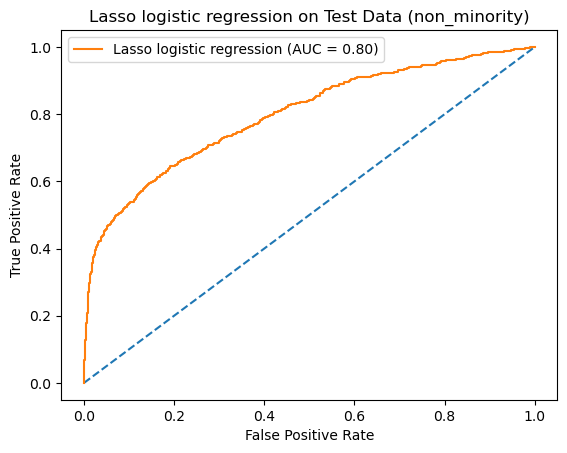

In [27]:
# Calculate and plot the ROC AUC curve for Lasso logistic regression
y_prob_non_minority = lasso_model.predict_proba(X_test_non_minority)[:, 1]
roc_auc = roc_auc_score(y_test_non_minority, y_prob_non_minority)
random_guess_non_minority = np.linspace(0, 1, len(y_test_non_minority))
plt.plot(random_guess_non_minority, random_guess_non_minority, linestyle='--')
fpr, tpr, thresholds = roc_curve(y_test_non_minority, y_prob_non_minority)
plt.title('Lasso logistic regression on Test Data (non_minority)')
plt.plot(fpr, tpr, label=f"Lasso logistic regression (AUC = {roc_auc:.2f})")
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()